In [ ]:
#Image uploading stuff for IN GOOGLE COLAB

#PLEASE upload all of the photos in the "Artist Images" that was in the github repository
#You can either use this code or drag and drop the images into the "files" section to the left of the screen <--
#Coded by Naomi, took ~1.5 hours in total to work it out

from google.colab import files

uploaded = files.upload()

In [5]:
#This block of text is for all of the necessary modules and packages
#install modules
!pip install lyricsgenius;
!pip install textblob;
!python -m textblob.download_corpora;
!pip install pillow

#import packagespip 
import lyricsgenius
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from gensim.summarization import keywords #contains functions to find keywords of the text 
import spacy # library for advanced Natural Language Processing | supports tokenization
import nltk #natural language toolkit that
from nltk.corpus import stopwords #defines the common words that are not necessary to understand the sentiment
nltk.download('stopwords')
stopwords = set(stopwords.words('english')) #variable for the stop words
from spacy.lang.en import English
nlp = English() #creates the npl object
nlp.max_length = 10000000 #ensures the document size isn't too large
import pandas as pd
from textblob import TextBlob #API for speech tagging 
from IPython import display #For helping us display the photo we need

Client_ID = 'UEVchXffSPkpCiLB9CIGt3__ZwqaGnbAzq4Cs80mlV3b0OOE_Z3Oa-xY7FKtsz-U' 
client_password = '3Hp3B2y3cOlL950cATehneaMpsqZMVhuMUpzHio57PJUF4cgn8LkyrzTBBRVFFd6el4ADdBnPujcrjuTzla3CA' 
Access_token = 'P0sZsd5S0iyJ8xpNTn56Qk4kN94fJLVNrXqza8vC9l7AlQ9vFEhmVvR3mzwkrU5c'

genius = lyricsgenius.Genius(Access_token)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Compliation of previous functions into this block
#Written by Naomi, took her ~4.5 hours

#Birthday sorting information and function to tell sign
#Written by Naomi, took her ~30 minutes

#Finding out the user's sign :)
#function written by chloe, took her ~1 hour

month_str = input("Enter your birth month (corresponding number, ex. 3 for March): ")
month_per = int(month_str) #Takes month string from the user and turns it into a number

day_str = input("Enter your birth day: ")
day_per = int(day_str) #Takes day string from the user and turns it into a number


#If user inputs invalid dates like February 35th or 13 for a month 
#Assigns the user's sign based on their date of birth
if (day_per > 30) and (month_per == 4 or month_per == 6 or month_per == 9 or month_per == 11):
  sign = 'not a valid date'
elif (day_per > 31) and (month_per == 1 or month_per == 3 or month_per == 5 or month_per == 7 or month_per == 8 or month_per == 10 or month_per == 12):
  sign = 'not a valid date'
elif (day_per > 29 and month_per == 2):
  sign = 'not a valid date'
elif ((month_per == 3) and (day_per >= 21)) or ((month_per == 4) and (day_per <= 19)):
  sign = 'Aries'
 
elif ((month_per == 4) and (day_per >= 20)) or ((month_per == 5) and (day_per <= 20)):
  sign = 'Taurus'

elif ((month_per == 5) and (day_per >= 21)) or ((month_per == 6) and (day_per <= 20)):
  sign = 'Gemini'
  
elif ((month_per == 6) and (day_per >= 21)) or ((month_per == 7) and (day_per <= 22)):
  sign = 'Cancer'
  
elif ((month_per == 7) and (day_per >= 23)) or ((month_per == 8) and (day_per <= 22)):
  sign = 'Leo'
  
elif ((month_per == 8) and (day_per >= 23)) or ((month_per == 9) and (day_per <= 22)):
  sign = 'Virgo'
  
elif ((month_per == 9) and (day_per >= 23)) or ((month_per == 10) and (day_per <= 22)):
  sign = 'Libra'
  
elif ((month_per == 10) and (day_per >= 23)) or ((month_per == 11) and (day_per <= 21)):
  sign = 'Scorpio'
  
elif ((month_per == 11) and (day_per >= 22)) or ((month_per == 12) and (day_per <= 21)):
  sign = 'Sagittarius'
  
elif ((month_per == 12) and (day_per >= 22)) or ((month_per == 1) and (day_per <= 19)):
  sign = 'Capricorn'
  
elif ((month_per == 1) and (day_per >= 20)) or ((month_per == 2) and (day_per <= 18)):
  sign = 'Aquarius'
  
elif ((month_per == 2) and (day_per >= 19)) or ((month_per == 3) and (day_per <= 20)):
  sign = 'Pisces'
    
else:
  sign = 'not a valid date'


if sign == 'not a valid date':
  print()
 

while sign == 'not a valid date': #Code will prompt the reader to "try again" if the first date they entered was invalid
  month_str = input("I'm sorry, it doesn't look like date you entered was valid. Let's try again! Please enter the month's value again: ")
  month_per = int(month_str) #Takes month string from the user and turns it into a number
  day_str = input("Enter your day of birth again: ")
  day_per = int(day_str) #Takes day string from the user and turns it into a number

  if ((month_per == 3) and (day_per >= 21)) or ((month_per == 4) and (day_per <= 19)):
    sign = 'Aries'
 
  elif ((month_per == 4) and (day_per >= 20)) or ((month_per == 5) and (day_per <= 20)):
    sign = 'Taurus'

  elif ((month_per == 5) and (day_per >= 21)) or ((month_per == 6) and (day_per <= 20)):
    sign = 'Gemini'
  
  elif ((month_per == 6) and (day_per >= 21)) or ((month_per == 7) and (day_per <= 22)):
   sign = 'Cancer'
  
  elif ((month_per == 7) and (day_per >= 23)) or ((month_per == 8) and (day_per <= 22)):
    sign = 'Leo'
  
  elif ((month_per == 8) and (day_per >= 23)) or ((month_per == 9) and (day_per <= 22)):
    sign = 'Virgo'
  
  elif ((month_per == 9) and (day_per >= 23)) or ((month_per == 10) and (day_per <= 22)):
    sign = 'Libra'
  
  elif ((month_per == 10) and (day_per >= 23)) or ((month_per == 11) and (day_per <= 21)):
    sign = 'Scorpio'
  
  elif ((month_per == 11) and (day_per >= 22)) or ((month_per == 12) and (day_per <= 21)):
    sign = 'Sagittarius'
  
  elif ((month_per == 12) and (day_per >= 22)) or ((month_per == 1) and (day_per <= 19)):
    sign = 'Capricorn'
  
  elif ((month_per == 1) and (day_per >= 20)) or ((month_per == 2) and (day_per <= 18)):
    sign = 'Aquarius'
  
  elif ((month_per == 2) and (day_per >= 19)) or ((month_per == 3) and (day_per <= 20)):
    sign = 'Pisces'

  print()

#Different traits the signs possess in the form of lists
#Written by Naomi, took her ~1.5 hours
#Lists of traits

Aries_Traits = ['Adventurous', 'Energetic', 'Pioneering', 'Courageous', 'Enthusiastic',
                'Confident', 'Dynamic', 'Quick-witted', 'Selfish', 'Quick-tempered',
                'Impulsive', 'Impatient', 'Foolhardy', 'Daredevil']

Taurus_Traits = ['Patient', 'Reliable', 'Warm-harted', 'Loving', 'Persistent',
                'Determined', 'Placid', 'Security-loving', 'Jealous', 'Possessive',
                'Resentful', 'Inflexible', 'Self-indulgent', 'Greedy']

Gemini_Traits = ['Adaptable', 'Versatile', 'Communicative', 'Witty', 'Intellectual',
                'Eloquent', 'Youthful', 'Lively', 'Nervous', 'Tense',
                'Superficial', 'Inconsistent', 'Cunning', 'Inquisitive']

Cancer_Traits = ['Emotional', 'Loving', 'Intuitive', 'Imaginative', 'Shrewd',
                'Cautious', 'Protective', 'Sympathetic', 'Changeable', 'Moody',
                'Overemotional', 'Touchy', 'Clingy', 'Insecure']

Leo_Traits = ['Generous', 'Warmhearted', 'Creative', 'Enthusiastic', 'Tolerant',
                'Expansive', 'Faithful', 'Loving', 'Pompous', 'Patronizing',
                'Bossy', 'Interfering', 'Dogmatic', 'Possessive']

Virgo_Traits = ['Modest', 'Shy', 'Meticulous', 'Reliable', 'Practical',
                'Diligent', 'Intelligent', 'Analytical', 'Fussy', 'Overthinker',
                'Overcritical', 'Harsh', 'Perfectionist', 'Conservative']

Libra_Traits = ['Diplomatic', 'Urbane', 'Romantic', 'Charming', 'Easygoing',
                'Sociable', 'Idealistic', 'Peaceable', 'Indecisive', 'Changeable',
                'Gullible', 'Impressionable', 'Flirtatious', 'Self-indulgent']

Scorpio_Traits = ['Determined', 'Forceful', 'Emotional', 'Intuitive', 'Powerful',
                'Passionate', 'Exciting', 'Magnetic', 'Jealous', 'Resentful',
                'Compulsive', 'Obsessive', 'Secretive', 'Obstinate']

Sag_Traits = ['Optimistic', 'Freedom-loving', 'Jovial', 'Good-humored', 'Honest',
                'Straightforward', 'Intellectual', 'Philosophical', 'eeeeeee', 'Careless',
                'Irresponsible', 'Superficial', 'Impatient', 'Restless']

Cap_Traits = ['Practical', 'Prudent', 'Ambitious', 'Disciplined', 'Patient',
                'Careful', 'Humorous', 'Reserved', 'Pessimistic', 'Fatalistic',
                'Miserly', 'Resentful', 'Stoic', 'Rigid']

Aqua_Traits = ['Friendly', 'Humanitarian', 'Honest', 'Loyal', 'Original',
                'Inventive', 'Independent', 'Intellectual', 'Intractable', 'Contrary',
                'Perverse', 'Unpredictable', 'Unemotional', 'Detached']

Pisces_Traits = ['Imaginative', 'Sensitive', 'Compassionate', 'Kind', 'Selfless',
                'Unworldly', 'Intuitive', 'Sympathetic', 'Escapist', 'Idealistic',
                'Secretive', 'Vague', 'Impressionable', 'Fickle']

#Takes the sign that you were just given from the previous code and gives you your traits and artists
#Artists based on birth months
#Took Naomi ~2.5 hour to "research"

print()

if sign == 'Aries':
  print('It looks like youre an Aries! Lets see what traits this sign typically posesses:')
  print(*Aries_Traits, sep = ", ")
  Artists = ['Fergie', 'Elton John', 'Selena', 'Marvin Gaye', 'Lady Gaga']

elif sign == 'Taurus':
  print('It looks like youre a Taurus! Lets see what traits this sign typically posesses:')
  print(*Taurus_Traits, sep = ", ")
  Artists = ['Adele', 'James Brown', 'Stevie Wonder', 'Enrique Iglesias', 'Cher']

elif sign == 'Gemini':
  print('It looks like youre a Gemini! Lets see what traits this sign typically posesses:')
  print(*Gemini_Traits, sep = ", ") 
  Artists = ['Normani', 'Prince', 'Kali Uchis', 'Lionel Richie', 'Lauryn Hill']

elif sign == 'Cancer':
  print('It looks like youre a Cancer! Lets see what traits this sign typically posesses:')
  print(*Cancer_Traits, sep = ", ")
  Artists = ['Ariana Grande', 'Jenni Rivera', 'George Michael', 'Cyndi Lauper', 'Luke Bryan']

elif sign == 'Leo':
  print('It looks like youre a Leo! Lets see what traits this sign typically posesses:')
  print(*Leo_Traits, sep = ", ")
  Artists = ['Demi Lovato', 'Jennifer Lopez', 'Paul Anka', 'Whitney Houston', 'Mick Jagger']

elif sign == 'Virgo':
  print('It looks like youre a Virgo! Lets see what traits this sign typically posesses:')
  print(*Virgo_Traits, sep = ", ") 
  Artists = ['Marc Anthony', 'Michael Jackson', 'Beyonce', 'Freddie Mercury', 'Amy Winehouse']

elif sign == 'Libra':
  print('It looks like youre a Libra! Lets see what traits this sign typically posesses:')
  print(*Libra_Traits, sep = ", ")
  Artists = ['Doja Cat', 'Bruno Mars', 'Gwen Stefani', 'Snoop Dogg', 'Bruce Springsteen']

elif sign == 'Scorpio':
  print('It looks like youre a Scorpio! Lets see what traits this sign typically posesses:')
  print(*Scorpio_Traits, sep = ", ")
  Artists = ['Katy Perry', 'Frank Ocean', 'Lorde', 'Keith Urban', 'Brad Paisley']

elif sign == 'Sagittarius':
  print('It looks like youre a Sagittarius! Lets see what traits this sign typically posesses:')
  print(*Sag_Traits, sep = ", ")
  Artists = ['Miley Cyrus', 'Frank Sinatra', 'Nicki Minaj', 'Jimi Hendrix', 'Britney Spears']

elif sign == 'Capricorn':
  print('It looks like youre a Capricorn! Lets see what traits this sign typically posesses:')
  print(*Cap_Traits, sep = ", ")
  Artists = ['Zayn Malik', 'Aaliyah', 'Elvis Presley', 'Ricky Martin', 'Dolly Parton']

elif sign == 'Aquarius':
  print('It looks like youre an Aquarius! Lets see what traits this sign typically posesses:')
  print(*Aqua_Traits, sep = ", ")
  Artists = ['Harry Styles', 'Shakira', 'Bob Marley', 'Alicia Keys', 'Phil Collins']

elif sign == 'Pisces':
  print('It looks like youre a Pisces! Lets see what traits this sign typically posesses:')
  print(*Pisces_Traits, sep = ", ")
  Artists = ['Rihanna', 'Carrie Underwood', 'Bon Jovi', 'Kesha', 'Bad Bunny']

print()

print('Here are 5 artists that share your sign!')
print(*Artists, sep = ", ") #prints out your lists of artists in a comma-separated list 
print()

#GIVE OPTION HERE TO LOOK AT A DIFFERENT SIGN OR LOOK AT AN ARTIST
artist_name = input("Please pick an artist from this list to get more information on them (Write their name as seen on the list): ")

#Artists and songs from Aries
if sign == 'Aries':
  if artist_name == 'Fergie': #if you're an ARIES and choose Fergie, you get the song Fergalicious and her specific birthday information
    song = 'Fergalicious'
    birthday = 'March 27, 1975'
  elif artist_name == 'Elton John': #same logic, different artist
    song = 'Tiny Dancer'
    birthday = 'March 25, 1947'
  elif artist_name == 'Selena':
    song = 'Bidi Bidi Bom Bom'
    birthday = 'April 16, 1971'
  elif artist_name == 'Marvin Gaye':
    song = 'Sexual Healing'
    birthday = 'April 2, 1939'
  elif artist_name == 'Lady Gaga':
    song = 'Bad Romance'
    birthday = 'March 28, 1986'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist': #while loop prompts the user to "try again" if their first artist didn't work 
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Fergie':
      song = 'Fergalicious'
      birthday = 'March 27, 1975'
    elif artist_name == 'Elton John':
      song = 'Tiny Dancer'
      birthday = 'March 25, 1947'
    elif artist_name == 'Selena':
      song = 'Bidi Bidi Bom Bom'
      birthday = 'April 16, 1971'
    elif artist_name == 'Marvin Gaye':
      song = 'Sexual Healing'
      birthday = 'April 2, 1939'
    elif artist_name == 'Lady Gaga':
      song = 'Bad Romance'
      birthday = 'March 28, 1986'
    else:
      artist_name = 'No artist'

#Artists and songs from Taurus
if sign == 'Taurus':
  if artist_name == 'Adele':
    song = 'Someone Like You'
    birthday = 'May 5, 1988'
  elif artist_name == 'James Brown':
    song = 'Get Up Offa That Thing'
    birthday = 'May 3, 1933'
  elif artist_name == 'Stevie Wonder':
    song = 'Isnt She Lovely'
    birthday = 'May 13, 1950'
  elif artist_name == 'Enrique Iglesias':
    song = 'El Pérdon'
    birthday = 'May 8, 1975'
  elif artist_name == 'Cher':
    song = 'If I Could Turn Back Time'
    birthday = 'May 20, 1946'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist': #while loop prompts the user to "try again" if their first artist didn't work 
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Adele':
      song = 'Someone Like You'
      birthday = 'May 5, 1988'
    elif artist_name == 'James Brown':
      song = 'Get Up Offa That Thing'
      birthday = 'May 3, 1933'
    elif artist_name == 'Stevie Wonder':
      song = 'Isnt She Lovely'
      birthday = 'May 13, 1950'
    elif artist_name == 'Enrique Iglesias':
      song = 'El Pérdon'
      birthday = 'May 8, 1975'
    elif artist_name == 'Cher':
      song = 'If I Could Turn Back Time'
      birthday = 'May 20, 1946'
    else:
      artist_name = 'No artist'

#Artists and songs from Gemini
if sign == 'Gemini':
  if artist_name == 'Normani':
    song = 'Motivation'
    birthday = 'May 31, 1996'
  elif artist_name == 'Prince':
    song = 'Purple Rain'
    birthday = 'June 7, 1958'
  elif artist_name == 'Paul McCartney':
    song = 'Love and Let Die'
    birthday = 'June 18, 1942'
  elif artist_name == 'Lionel Richie':
    song = 'Say You, Say Me'
    birthday = 'June 20, 1949'
  elif artist_name == 'Lauryn Hill':
    song = 'Doo Wop (That Thing)'
    birthday = 'May 26, 1975'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist': #while loop prompts the user to "try again" if their first artist didn't work 
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Normani':
      song = 'Motivation'
      birthday = 'May 31, 1996'
    elif artist_name == 'Prince':
      song = 'Purple Rain'
      birthday = 'June 7, 1958'
    elif artist_name == 'Paul McCartney':
      song = 'Love and Let Die'
      birthday = 'June 18, 1942'
    elif artist_name == 'Lionel Richie':
      song = 'Say You, Say Me'
      birthday = 'June 20, 1949'
    elif artist_name == 'Lauryn Hill':
      song = 'Doo Wop (That Thing)'
      birthday = 'May 26, 1975'
    else:
      artist_name = 'No artist'

#Artists and songs from Cancer
if sign == 'Cancer':
  if artist_name == 'Ariana Grande':
    song = 'thank u, next'
    birthday = 'June 26, 1993'
  elif artist_name == 'Jenni Rivera':
    song = 'Ya Lo Sé'
    birthday = 'July 2, 1969'
  elif artist_name == 'George Michael':
    song = 'Careless Whisper'
    birthday = 'June 25, 1963'
  elif artist_name == 'Cyndi Lauper':
    song = 'Girls Just Want to Have Fun'
    birthday = 'June 22, 1953'
  elif artist_name == 'Luke Bryan':
    song = 'Play It Again'
    birthday = 'July 17, 1976'
  else:
    print('Im sorry, this artist is not in your list.')

  while artist_name == 'No artist': #while loop prompts the user to "try again" if their first artist didn't work 
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Ariana Grande':
      song = 'thank u, next'
      birthday = 'June 26, 1993'
    elif artist_name == 'Jenni Rivera':
      song = 'Ya Lo Sé'
      birthday = 'July 2, 1969'
    elif artist_name == 'George Michael':
      song = 'Careless Whisper'
      birthday = 'June 25, 1963'
    elif artist_name == 'Cyndi Lauper':
      song = 'Girls Just Want to Have Fun'
      birthday = 'June 22, 1953'
    elif artist_name == 'Luke Bryan':
      song = 'Play It Again'
      birthday = 'July 17, 1976'
    else:
      artist_name = 'No artist'

#Artists and songs from Leo
if sign == 'Leo':
  if artist_name == 'Demi Lovato':
    song = 'Sorry Not Sorry'
    birthday = 'August 20, 1992'
  elif artist_name == 'Jennifer Lopez':
    song = 'Lets Get Loud'
    birthday = 'July 24, 1969'
  elif artist_name == 'Paul Anka':
    song = 'Put Your Head on My Shoulder'
    birthday = 'July 30, 1941'
  elif artist_name == 'Whitney Houston':
    song = 'I Wanna Dance with Somebody'
    birthday = 'August 9, 1963'
  elif artist_name == 'Mick Jagger':
    song = 'Old Habits Die Hard'
    birthday = 'July 26, 1943'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist': #while loop prompts the user to "try again" if their first artist didn't work 
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Demi Lovato':
      song = 'Sorry Not Sorry'
      birthday = 'August 20, 1992'
    elif artist_name == 'Jennifer Lopez':
      song = 'Lets Get Loud'
      birthday = 'July 24, 1969'
    elif artist_name == 'Paul Anka':
      song = 'Put Your Head on My Shoulder'
      birthday = 'July 30, 1941'
    elif artist_name == 'Whitney Houston':
      song = 'I Wanna Dance with Somebody'
      birthday = 'August 9, 1963'
    elif artist_name == 'Mick Jagger':
      song = 'Old Habits Die Hard'
      birthday = 'July 26, 1943'
    else:
      artist_name = 'No artist'

#Artists and songs from Virgo
if sign == 'Virgo':
  if artist_name == 'Marc Anthony':
    song = 'Vivir Mi Vida'
    birthday = 'September 16, 1968'
  elif artist_name == 'Michael Jackson':
    song = 'Billie Jean'
    birthday = 'August 29, 1958'
  elif artist_name == 'Beyonce':
    song = 'Love On Top'
    birthday = 'September 4, 1981'
  elif artist_name == 'Freddie Mercury':
    song = 'The Great Pretender'
    birthday = 'September 5, 1946'
  elif artist_name == 'Amy Winehouse':
    song = 'Back To Black'
    birthday = 'September 14, 1983'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist': #while loop prompts the user to "try again" if their first artist didn't work 
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Marc Anthony':
      song = 'Vivir Mi Vida'
      birthday = 'September 16, 1968'
    elif artist_name == 'Michael Jackson':
      song = 'Billie Jean'
      birthday = 'August 29, 1958'
    elif artist_name == 'Beyonce':
      song = 'Love On Top'
      birthday = 'September 4, 1981'
    elif artist_name == 'Freddie Mercury':
      song = 'The Great Pretender'
      birthday = 'September 5, 1946'
    elif artist_name == 'Amy Winehouse':
      song = 'Back To Black'
      birthday = 'September 14, 1983'
    else:
      artist_name = 'No artist'

#Artists and songs from Libra
if sign == 'Libra':
  if artist_name == 'Doja Cat':
    song = 'Say So'
    birthday = 'October 21, 1995'
  elif artist_name == 'Bruno Mars':
    song = 'Leave The Door Open'
    birthday = 'October 8, 1985'
  elif artist_name == 'Gwen Stefani':
    song = 'Hollaback Girl'
    birthday = 'October 3, 1969'
  elif artist_name == 'Snoop Dogg':
    song = 'Drop It Like Its Hot'
    birthday = 'October 20, 1971'
  elif artist_name == 'Bruce Springsteen':
    song = 'Dancing In The Dark'
    birthday = 'September 23, 1949'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist': #while loop prompts the user to "try again" if their first artist didn't work 
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Doja Cat':
      song = 'Say So'
      birthday = 'October 21, 1995'
    elif artist_name == 'Bruno Mars':
      song = 'Leave The Door Open'
      birthday = 'October 8, 1985'
    elif artist_name == 'Gwen Stefani':
      song = 'Hollaback Girl'
      birthday = 'October 3, 1969'
    elif artist_name == 'Snoop Dogg':
      song = 'Drop It Like Its Hot'
      birthday = 'October 20, 1971'
    elif artist_name == 'Bruce Springsteen':
      song = 'Dancing In The Dark'
      birthday = 'September 23, 1949'
    else:
      artist_name = 'No artist'

#Artists and songs from Scorpio
if sign == 'Scorpio':
  if artist_name == 'Katy Perry':
    song = 'The One That Got Away'
    birthday = 'October 25, 1984'
  elif artist_name == 'Frank Ocean':
    song = 'Thinkin Bout You'
    birthday = 'October 28, 1987'
  elif artist_name == 'Lorde':
    song = 'Royals'
    birthday = 'November 7, 1996'
  elif artist_name == 'Keith Urban':
    song = 'Blue Aint Your Color'
    birthday = 'October 26, 1967'
  elif artist_name == 'Brad Paisley':
    song = 'Shes Everything'
    birthday = 'October 28, 1972'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist': #while loop prompts the user to "try again" if their first artist didn't work 
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Katy Perry':
      song = 'The One That Got Away'
      birthday = 'October 25, 1984'
    elif artist_name == 'Frank Ocean':
      song = 'Thinkin Bout You'
      birthday = 'October 28, 1987'
    elif artist_name == 'Lorde':
      song = 'Royals'
      birthday = 'November 7, 1996'
    elif artist_name == 'Keith Urban':
      song = 'Blue Aint Your Color'
      birthday = 'October 26, 1967'
    elif artist_name == 'Brad Paisley':
      song = 'Shes Everything'
      birthday = 'October 28, 1972'
    else:
      artist_name = 'No artist'

#Artists and songs from Sagittarius
if sign == 'Sagittarius':
  if artist_name == 'Miley Cyrus':
    song = 'Midnight Sky'
    birthday = 'November 23, 1992'
  elif artist_name == 'Frank Sinatra':
    song = 'My Way'
    birthday = 'December 12, 1915'
  elif artist_name == 'Nicki Minaj':
    song = 'Starships'
    birthday = 'December 8, 1982'
  elif artist_name == 'Jimi Hendrix':
    song = 'All Along the Watchtower'
    birthday = 'November 27, 1942'
  elif artist_name == 'Britney Spears':
    song = 'Toxic'
    birthday = 'December 2, 1981'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist': #while loop prompts the user to "try again" if their first artist didn't work 
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Miley Cyrus':
      song = 'Midnight Sky'
      birthday = 'November 23, 1992'
    elif artist_name == 'Frank Sinatra':
      song = 'My Way'
      birthday = 'December 12, 1915'
    elif artist_name == 'Nicki Minaj':
      song = 'Starships'
      birthday = 'December 8, 1982'
    elif artist_name == 'Jimi Hendrix':
      song = 'All Along the Watchtower'
      birthday = 'November 27, 1942'
    elif artist_name == 'Britney Spears':
      song = 'Toxic'
      birthday = 'December 2, 1981'
    else:
      artist_name = 'No artist'

#Artists and songs from Capricorn
if sign == 'Capricorn':
  if artist_name == 'Zayn Malik':
    song = 'PILLOWTALK'
    birthday = 'January 12, 1993'
  elif artist_name == 'Aaliyah':
    song = 'Im So Into You'
    birthday = 'January 16, 1979'
  elif artist_name == 'Elvis Presley':
    song = 'Jailhouse Rock'
    birthday = 'January 8, 1935'
  elif artist_name == 'Ricky Martin':
    song = 'Vente Pa Ca'
    birthday = 'December 24, 1971'
  elif artist_name == 'Dolly Parton':
    song = 'Jolene'
    birthday = 'January 19, 1946'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist': #while loop prompts the user to "try again" if their first artist didn't work 
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Zayn Malik':
      song = 'PILLOWTALK'
      birthday = 'January 12, 1993'
    elif artist_name == 'Aaliyah':
      song = 'Im So Into You'
      birthday = 'January 16, 1979'
    elif artist_name == 'Elvis Presley':
      song = 'Jailhouse Rock'
      birthday = 'January 8, 1935'
    elif artist_name == 'Ricky Martin':
      song = 'Vente Pa Ca'
      birthday = 'December 24, 1971'
    elif artist_name == 'Dolly Parton':
      song = 'Jolene'
      birthday = 'January 19, 1946'
    else:
      artist_name = 'No artist'

#Artists and songs from Aquarius
if sign == 'Aquarius':
  if artist_name == 'Harry Styles':
    song = 'Adore You'
    birthday = 'February 1, 1994'
  elif artist_name == 'Shakira':
    song = 'Hips Dont Lie'
    birthday = 'February 2, 1977'
  elif artist_name == 'Bob Marley':
    song = 'Could You Be Loved'
    birthday = 'February 6, 1945'
  elif artist_name == 'Alicia Keys':
    song = 'No One'
    birthday = 'January 25, 1981'
  elif artist_name == 'Phil Collins':
    song = 'You Cant Hurry Love'
    birthday = 'January 30, 1951'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist': #while loop prompts the user to "try again" if their first artist didn't work 
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Harry Styles':
      song = 'Adore You'
      birthday = 'February 1, 1994'
    elif artist_name == 'Shakira':
      song = 'Hips Dont Lie'
      birthday = 'February 2, 1977'
    elif artist_name == 'Bob Marley':
      song = 'Could You Be Loved'
      birthday = 'February 6, 1945'
    elif artist_name == 'Alicia Keys':
      song = 'No One'
      birthday = 'January 25, 1981'
    elif artist_name == 'Phil Collins':
      song = 'You Cant Hurry Love'
      birthday = 'January 30, 1951'
    else:
      artist_name = 'No artist'

#Artists and songs from Pisces
if sign == 'Pisces':
  if artist_name == 'Rihanna':
    song = 'Love On The Brain'
    birthday = 'February 20, 1988'
  elif artist_name == 'Carrie Underwood':
    song = 'Church Bells'
    birthday = 'March 10, 1983'
  elif artist_name == 'Bon Jovi':
    song = 'You Give Love A Bad Name'
    birthday = 'March 18, 1970'
  elif artist_name == 'Kesha':
    song = 'Die Young'
    birthday = 'March 1, 1987'
  elif artist_name == 'Bad Bunny':
    song = 'DAKITI'
    birthday = 'March 10, 1994'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist': #while loop prompts the user to "try again" if their first artist didn't work 
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Rihanna':
      song = 'Love On The Brain'
      birthday = 'February 20, 1988'
    elif artist_name == 'Carrie Underwood':
      song = 'Church Bells'
      birthday = 'March 10, 1983'
    elif artist_name == 'Bon Jovi':
      song = 'You Give Love A Bad Name'
      birthday = 'March 18, 1970'
    elif artist_name == 'Kesha':
      song = 'Die Young'
      birthday = 'March 1, 1987'
    elif artist_name == 'Bad Bunny':
      song = 'DAKITI'
      birthday = 'March 10, 1994'
    else:
      artist_name = 'No artist'

artist_picture = artist_name.replace(' ', '_') + '.jpeg' #Alters the artist name given into the name of the file of their .jpeg, used to open a photo

print()
print('Youve chosen ' + artist_name + ' - Their birthday is on ' + birthday + ', making them the same sign as you! A popular song of theirs is \'' + song + '.\'')
print()


Enter your birth month (corresponding number, ex. 3 for March): 3
Enter your birth day: 3

It looks like youre a Pisces! Lets see what traits this sign typically posesses:
Imaginative, Sensitive, Compassionate, Kind, Selfless, Unworldly, Intuitive, Sympathetic, Escapist, Idealistic, Secretive, Vague, Impressionable, Fickle

Here are 5 artists that share your sign!
Rihanna, Carrie Underwood, Bon Jovi, Kesha, Bad Bunny

Please pick an artist from this list to get more information on them (Write their name as seen on the list): Rihanna

Youve chosen Rihanna - Their birthday is on February 20, 1988, making them the same sign as you! A popular song of theirs is 'Love On The Brain.'



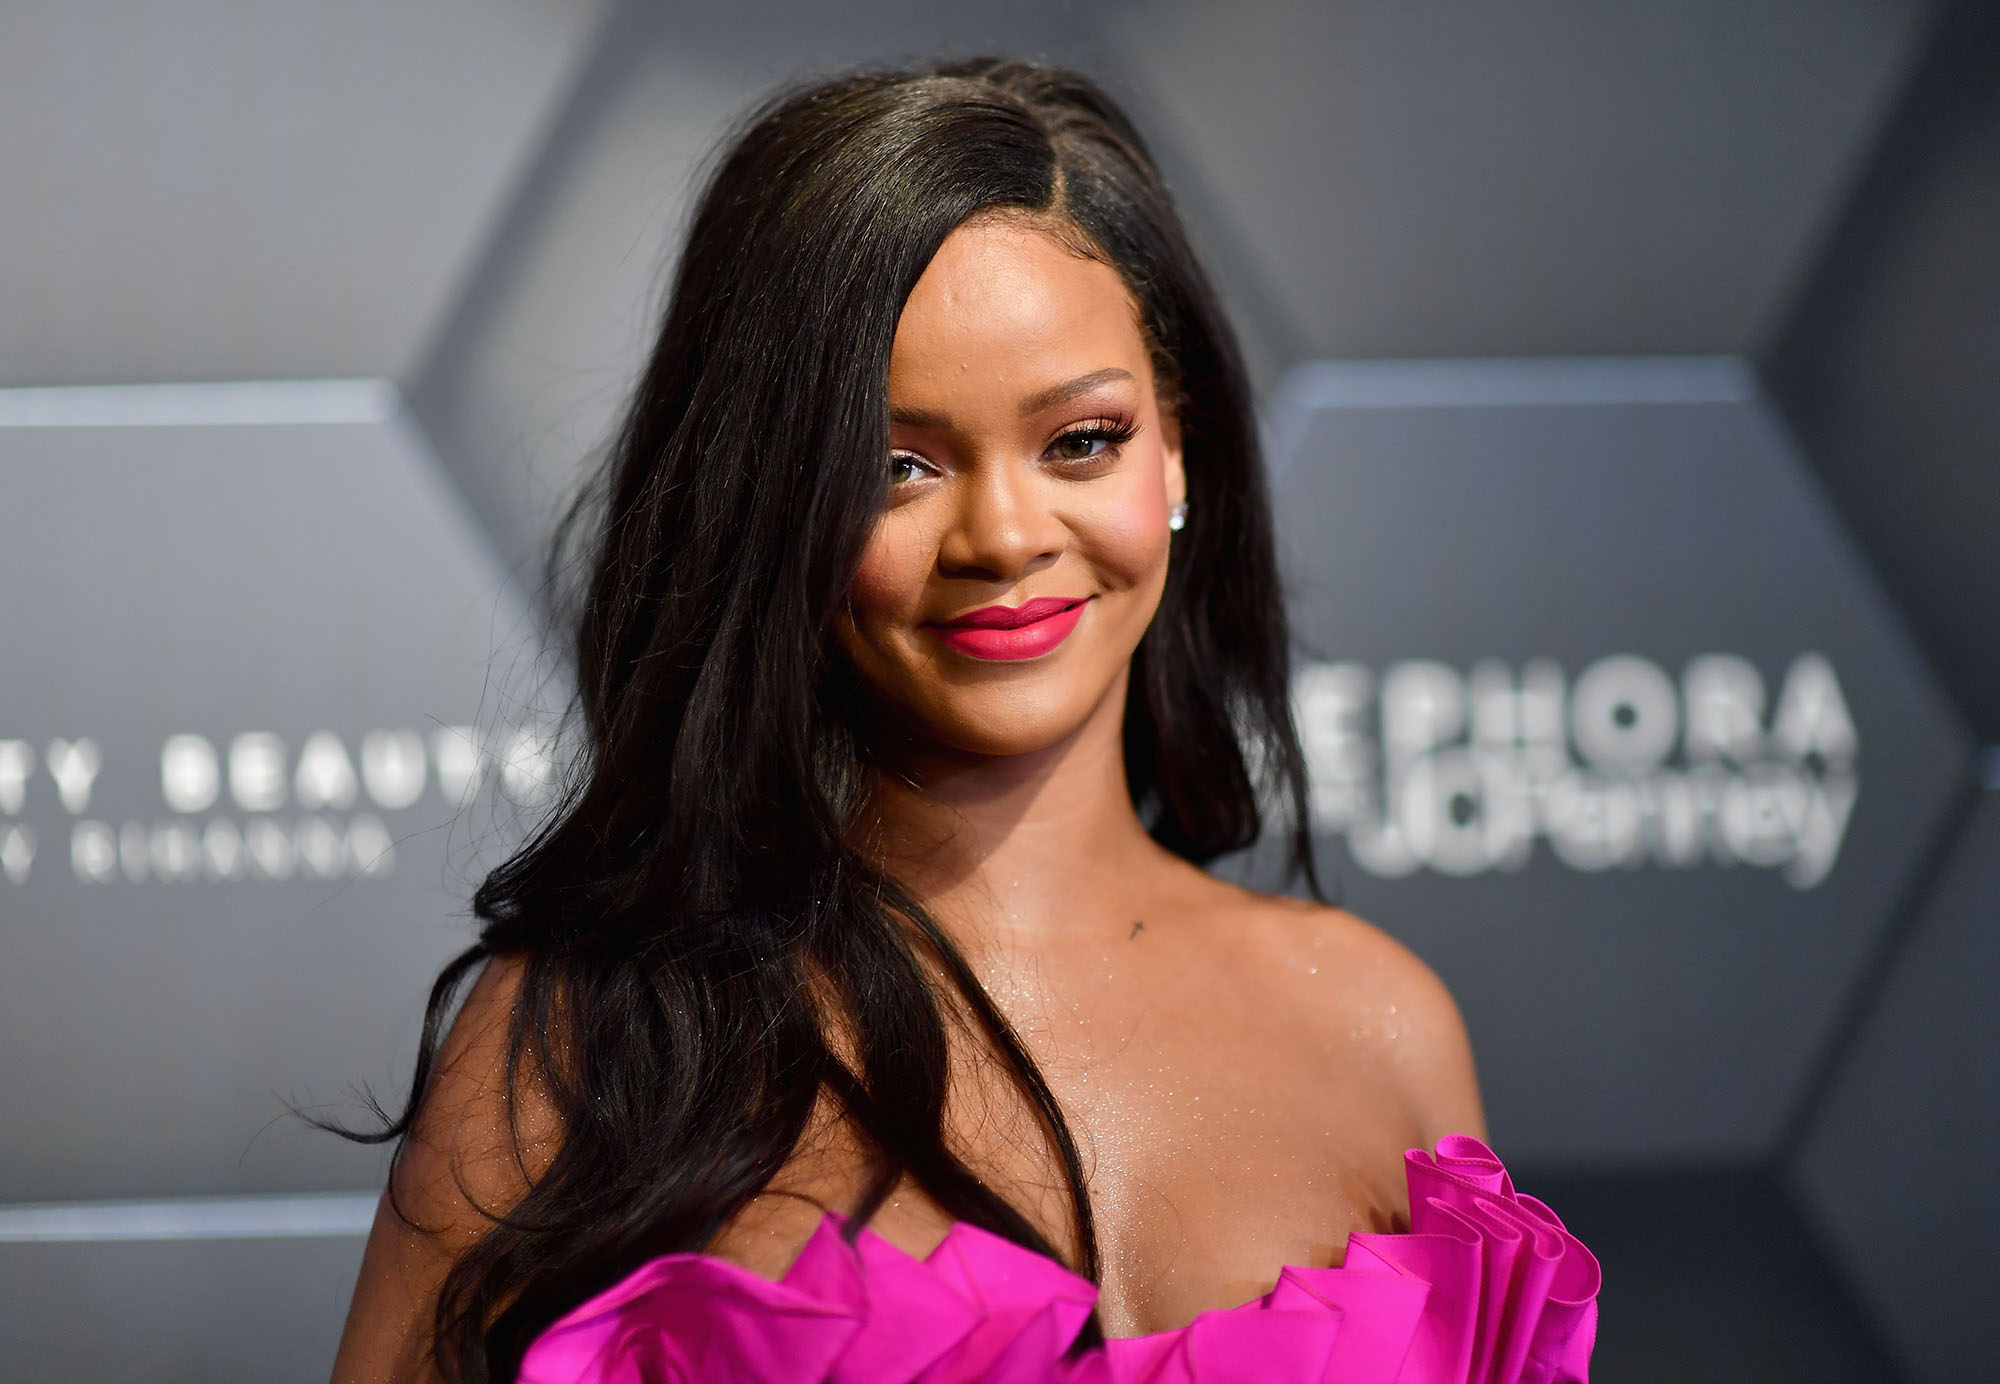

In [3]:
#Displays a photo of the artist they chose 
display.Image(artist_picture, width=400)

Do you want to see the lyrics to 'Love On The Brain' by Rihanna? Type yes or no: yes

Searching for "Love On The Brain" by Rihanna...
Done.

Here are the lyrics to that song:
[Verse 1]
And you got me like, "Oh, what you want from me?"
(What you want from me?)
And I tried to buy your pretty heart, but the price too high
Baby, you got me like "Oh"
You love when I fall apart (fall apart)
So you can put me together and throw me against the wall

[Pre-Chorus]
Baby you got me like i-i-i-i-i-i-i-i-i-hiii, woo i-i-i-i-i-i-i-i-i-hiii
Don't you stop loving me (loving me)
Don't quit loving me (loving me)
Just start loving me (loving me)
Owwwwww

[Chorus]
And babe I’m fist-fighting with fire
Just to get close to you
Can we burn something babe
And I run for miles just to get a taste
Must be love on the brain
That’s got me feeling this way
It beats me black and blue but it fucks me so good
And I can’t get enough
Must be love on the brain yeah
And it keeps cursing my name
No matter what I do
I’m no g

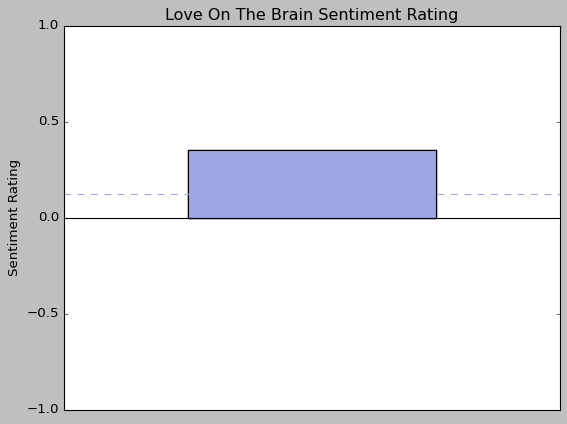


The sentiment rating is on a scale from -1 to 1, where 1 has the most positive and -1 is the least positive.

The average the top 100 songs of the past 60 years is 0.125.
Your song is 2.8 times more positive than the average!

That is everything we have for this song! 
Would you like to learn about another song? Type yes or no: yes

Type the name of the artist: Harry Styles
Type the name of the song: Adore You

Searching for "Adore You" by Harry Styles...
Done.
Here are the lyrics to that song:
[Verse 1: Harry Styles]
Walk in your rainbow paradise (Paradise)
Strawberry lipstick state of mind (State of mind)
I get so lost inside your eyes
Would you believe it?

[Pre-Chorus: Harry Styles]
You don't have to say you love me
You don't have to say nothing
You don't have to say you're mine

[Chorus: Harry Styles]
Honey (Ah-ah-ah)
I'd walk through fire for you
Just let me adore you
Oh, honey (Ah-ah-ah)
I'd walk through fire for you
Just let me adore you
Like it's the only thing I'll ever do
L

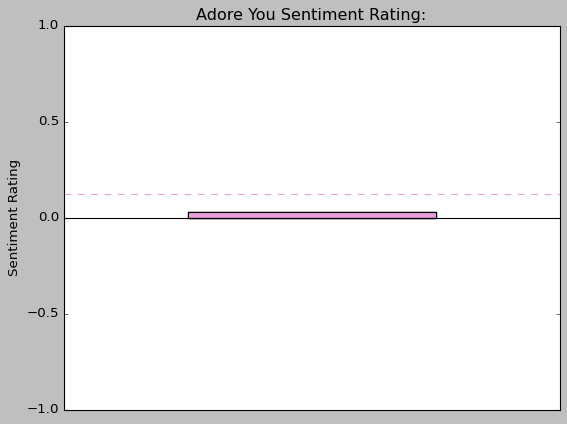


The sentiment rating is on a scale from -1 to 1, where 1 has the most positive and -1 is the least positive.

The average the top 100 songs of the past 60 years is 0.125.
Your song is 0.24 times more negative than the average!

That is everything we have! You can quit the program and enter another date to learn more about other signs!


In [4]:
#finds lyrics to this specific song
#getting lyrics from genius
def get_lyrics(title, artist):
  try:
    lyrics = genius.search_song(title, artist).lyrics
    return lyrics
  except:
    return 'not found'

see_lyrics = input('Do you want to see the lyrics to \'' + song + '\' by ' + artist_name + '? Type yes or no: ')
print()
if see_lyrics == 'yes':
  sign_text = get_lyrics(song, artist_name)
  print()
  print('Here are the lyrics to that song:')
  print(sign_text)  #if you want to see the lyrics, they get printed
elif see_lyrics =='no':
  print('Okay, you can quit the program and enter another date to learn more about other signs!') #if you don't they won't get printed
else:
  print('That is not an option')  #yes or no question

print()
lyric_info = input('Do you want text analysis of this song? Type yes or no: ')
print() #white space

#pre-processing text
def preprocess(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)

#Takes keywords from lyrics
def return_keywords(text):
    xkeywords = []
    values = keywords(text=preprocess(text),split='\n',scores=True)
    for x in values[:10]:
        xkeywords.append(x[0])  #Turns keywords into a list
    try:
        return xkeywords 
    except:
        return "no content"

#Gives you the lyric sentiment value
def get_lyric_sentiment(lyrics): 
	analysis = TextBlob(lyrics) 
	return analysis.sentiment.polarity

#Coded by Chloe, took her ~1.5 hours to do
if lyric_info == 'yes':
  preprocess(sign_text)
  print('Here are the most common words in this song:')
  print(return_keywords(sign_text)) #gives keywords from the osng
  print()
  print("Here is the song's sentiment rating:")
  rating = round(get_lyric_sentiment(sign_text), 2) #gives song sentiment rating
  compare = str(rating/.125)
  print(rating)
 

  #CHART HERE, creates visual to see
  plt.style.use('classic')
  x = np.arange(1,6) 
  y = 0 * x
  y_avg = 0 * x + 0.125 
  y2 = 0 * x + rating 
  plt.title(song + " Sentiment Rating") 
  #plt.xlabel("x axis caption") 
  plt.ylabel("Sentiment Rating") 
  plt.xticks([])
  plt.xlim([1, 5])
  plt.ylim([-1,1])
  plt.plot(x,y, color = 'k')
  plt.plot(x,y_avg, ls = '--', color = '#9EA7E4')  
  plt.bar(3, y2, width = 2,  color = '#9EA7E4', align = 'center')
  plt.show()

 

  print()
  print('The sentiment rating is on a scale from -1 to 1, where 1 has the most positive and -1 is the least positive.')  #Explanation of what the sentiment rating means
  print()
  print('The average the top 100 songs of the past 60 years is 0.125.')

  if rating > 0.125:
    print('Your song is ' + compare + ' times more positive than the average!')
  elif rating < 0.125:
    print('Your song is ' + compare + ' times more negative than the average!')
  else:
    print('Your song is equal to the average.')
elif lyric_info == 'no':  #Returns message if the user says no
  print('Okay, you can quit the program and enter another date to learn more about other signs!')
else:
  print('That is not an option')

print()
other_song = input('That is everything we have for this song! \nWould you like to learn about another song? Type yes or no: ' )

if other_song == 'yes':
  print()
  own_artist = input('Type the name of the artist: ')
  own_song = input('Type the name of the song: ')
  print()
  own_text = get_lyrics(own_song, own_artist)
  print('Here are the lyrics to that song:')
  print(own_text)
  preprocess(own_text)
  print()
  print('Here are the most common words in this song')
  print(return_keywords(own_text))
  print()
  print("Here is the song's sentiment rating:")
  own_rating = round(get_lyric_sentiment(own_text), 2) #gives song sentiment rating
  own_compare = str(own_rating/.125)

  print(own_rating)
  #CHART HERE
  plt.style.use('classic')
  x = np.arange(1,6) 
  y = 0 * x
  y_avg = 0 * x + 0.125 
  y2 = 0 * x + own_rating 
  plt.title(own_song + " Sentiment Rating:") 
  #plt.xlabel("x axis caption") 
  plt.ylabel("Sentiment Rating") 
  plt.xticks([])
  plt.xlim([1, 5])
  plt.ylim([-1,1])
  plt.plot(x,y, color = 'k')
  plt.plot(x,y_avg, ls = '--', color = '#E49EDA')  
  plt.bar(3, y2, width = 2,  color = '#E49EDA', align = 'center')
  plt.show()



  print()
  print('The sentiment rating is on a scale from -1 to 1, where 1 has the most positive and -1 is the least positive.')  #Explanation of what the sentiment rating means
  print()
  print('The average the top 100 songs of the past 60 years is 0.125.')

  if own_rating > 0.125:
    print('Your song is ' + own_compare + ' times more positive than the average!')
  elif own_rating < 0.125:
    print('Your song is ' + own_compare + ' times more negative than the average!')
  else:
    print('Your song is equal to the average.')
elif other_song == 'no':
  print('Okay, you can quit the program and enter another date to learn more about other signs!')
else:
  print('That is not an option.')

print()
print('That is everything we have! You can quit the program and enter another date to learn more about other signs!')

In [ ]:
#This block was used as practice for practice
#EVERYTHING BELOW IS NOT NEEDED.


import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('classic')
x = np.arange(1,6) 
y = 0 * x
y_avg = 0 * x + .25 
y2 = 0 * x - .4 
plt.title("sentiment rating") 
#plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.xlim([1, 5])
plt.ylim([-1,1])
#plt.xlim([25, 50])
plt.xticks([])
plt.plot(x,y, color = 'k')
plt.plot(x,y_avg, ls = '--', color = '#E49EDA')  
plt.bar(3, y2, width = 2,  color = '#E49EDA', align = 'center')
plt.show()

num = round(1.2002312313*100 / 100)
print(num)

In [ ]:
#BLOCK NOT NEEDED FOR OUR PROJECT. JUST WANTED TO SHOWCASE WORK WE DID ON THIS.

#Coded by Chloe, took her about ~3 hours 
#This block reads in the csv for the songs and creates a new table with just the song and artist for the years we want
#import billboard hot100 dataset
hot100_df = pd.read_csv('https://query.data.world/s/qf6et5c7dh23kglnvjcoztlmom62it')
hot100_df.drop_duplicates(subset='SongID', inplace = True) #remove duplicate occurrences of songs
hot100_df.reset_index()

#Turns the csv into a table
#Use get_lyrics funcion to get lyrics for every song in dataset
hold_df = hot100_df.iloc[:, [1, 3, 4]]

# size = hold_df.size
# for x in range(size):
#   hold_df.iloc[x, 0] = int(hold_df.iloc[x, 0][-4:])
#   if hold_df.iloc[x, 0] < 1990:
#     clean_df = hold_df.drop[]]


# print(clean_df)

#int(hold_df.iloc[1000, 0][-4:])
#print(clean_df)




In [ ]:
#Coded by Chloe and Naomi, took ~2 hours

!pip install lyricsgenius

#Information for the lyric genius API to connect genius to our program
Client_ID = 'UEVchXffSPkpCiLB9CIGt3__ZwqaGnbAzq4Cs80mlV3b0OOE_Z3Oa-xY7FKtsz-U' 
client_password = '3Hp3B2y3cOlL950cATehneaMpsqZMVhuMUpzHio57PJUF4cgn8LkyrzTBBRVFFd6el4ADdBnPujcrjuTzla3CA' 
Access_token = 'P0sZsd5S0iyJ8xpNTn56Qk4kN94fJLVNrXqza8vC9l7AlQ9vFEhmVvR3mzwkrU5c'



#Genius stuff
genius = lyricsgenius.Genius(Access_token)
#artist = genius.search_artist("Rihanna", max_songs=1, sort="title")
#print(artist.songs)



#getting lyrics from genius
def get_lyrics(title, artist):
  try:
    return genius.search_song(title, artist).lyrics
  except:
    return 'not found'

#pre-processing text
def preprocess(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)

#preprocess(text)
print()

def return_keywords(texts):
    xkeywords = []
    values = keywords(text=preprocess(texts),split='\n',scores=True)
    for x in values[:10]:
        xkeywords.append(x[0])
    try:
        return xkeywords 
    except:
        return "no content"

#return_keywords(text)
def get_lyric_sentiment(lyrics): 
	analysis = TextBlob(lyrics) 
	return analysis.sentiment.polarity

all_keywords = []

# for x in range(1):
#   title = hold_df.iloc[x, 1]
#   artist = hold_df.iloc[x, 2]
#   text = get_lyrics(title, artist)
#   preprocess(text)
#   #print(return_keywords(text))
#   all_keywords += return_keywords(text)
#   get_lyric_sentiment(text)

# print(all_keywords)
# print(get_lyric_sentiment(text))



In [ ]:
#NOT WORKING - Not used in our code
#Code for displaying images in GUI:
#Written by Naomi, took her ~1 hour

from tkinter import *  
from PIL import ImageTk,Image  
root = Tk()  
canvas = Canvas(root, width = 400, height = 400)  
canvas.pack()  
img = ImageTk.PhotoImage(Image.open(artist_picture)  
canvas.create_image(20, 20, anchor=NW, image=img) 
root.mainloop() 

#Take 2
#Idk what the difference is between the earlier one and this one but we can sort that out in a bit
from PIL import Image

#read the image
im = Image.open(artist_picture)

#show image
im.show()